# Smart Factory Energy Prediction Challenge

## Problem Statement

You've been hired as a data scientist for SmartManufacture Inc., a leading industrial automation company. The company has deployed an extensive sensor network throughout one of their client's manufacturing facilities to monitor environmental conditions and energy usage.

The client is concerned about the increasing energy costs associated with their manufacturing equipment. They want to implement a predictive system that can forecast equipment energy consumption based on various environmental factors and sensor readings from different zones of the factory.

## Task

Your assignment is to develop a machine learning model that can accurately predict the energy consumption of industrial equipment (equipment_energy_consumption) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction.

## Goals

1. Analyze the provided sensor data to identify patterns and relationships between environmental factors and equipment energy consumption ✅
2. Build a robust regression model to predict equipment energy consumption
3. Evaluate the model's performance using appropriate metrics
4. Provide actionable insights and recommendations for reducing energy consumption

## Notes on Feature Selection and Random Variables

The dataset includes two variables named random_variable1 and random_variable2. Part of your task is to determine, through proper data analysis and feature selection techniques, whether these variables should be included in your model or not. This mimics real-world scenarios where not all available data is necessarily useful for prediction.

Your approach to handling these variables should be clearly documented and justified in your analysis. This will be an important part of evaluating your feature selection methodology.

Note that your final solution will also be evaluated on a separate holdout dataset that we maintain privately, which serves as an additional check on your model's generalization capability.

## Deliverables

Your submission should include:

1. **A well-documented Jupyter notebook** containing:
   - Exploratory data analysis (EDA)
   - Data preprocessing steps
   - Feature engineering and selection
   - Model development and training
   - Model evaluation and testing
   - Key findings and insights

2. **Python script(s)/notebook(s)** with your final model implementation

3. **A brief report (PDF or Markdown format)** summarizing:
   - Your approach to the problem
   - Key insights from the data
   - Model performance evaluation
   - Recommendations for reducing equipment energy consumption

## Evaluation Criteria

Your solution will be evaluated based on:

1. **Code Quality and Structure (25%)**
   - Clean, well-organized, and properly documented code
   - Appropriate use of functions and classes
   - Effective use of Git with meaningful commit messages
   - Code readability and adherence to Python conventions

2. **Data Analysis and Preprocessing (25%)**
   - Thoroughness of exploratory data analysis
   - Handling of missing values, outliers, and data transformations
   - Feature engineering creativity and effectiveness
   - Proper data splitting methodology

3. **Model Development (25%)**
   - Selection and justification of algorithms
   - Hyperparameter tuning approach
   - Implementation of cross-validation
   - Model interpretability considerations

4. **Results and Insights (25%)**
   - Model performance metrics (RMSE, MAE, R²) on both the test dataset and our private holdout dataset
   - Quality of visualizations and explanations
   - Practical insights and recommendations
   - Critical evaluation of model limitations

## Dataset
>Smart Factory Sensor Data and it's description is in the docs folder.

## Model training
>Pick a model as needed

## Evaluation
>RMSE, MAE and R2 metrics for evaluation

## Experimentation
>Perform experimentation to improve performance

## Dealing with additional variables
>1. I'll see the correlation between predictors and the target variable
>2. I'll build a RandomForestRegressor model and get feature importances from it
>Using these two ways, I'll decide which random variable/s to inlcude or exclude

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Analysis and Preprocessing
### Load the data

In [2]:
data=pd.read_csv('data/data.csv')

In [3]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [4]:
data.shape

(16857, 29)

The data has 16857 rows and 29 columns.

In [5]:
data.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


So there are 23 numeric columns and most columns have missing values which should be imputed.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

So there are 6 text columns and 23 numeric columns in this dataset.

In [7]:
data.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

Missing values

In [8]:
data.isna().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

### Parsing dates

The dataset has a datetime format column i.e. the timestamp column. So I'll use the `parse_dates` parameter while loading the data.

In [9]:
data=pd.read_csv('data/data.csv',parse_dates=['timestamp'],low_memory=False)

Now look at the data. The timestamp will have datetime as type

In [10]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [11]:
data.describe()

,timestamp,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,2016-03-10 00:10:00,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,2016-04-08 03:40:00,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,2016-12-01 15:50:00,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [13]:
data.timestamp

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
16852   2016-10-03 20:10:00
16853   2016-10-04 06:10:00
16854   2016-11-03 00:50:00
16855   2016-11-04 13:20:00
16856   2016-12-01 15:50:00
Name: timestamp, Length: 16857, dtype: datetime64[ns]

timestamp column is already in sorted order

### Split into train and test sets

And keep test set away from the model.

In [14]:
split_index=int(len(data)*0.8)
train_data=data.iloc[:split_index]
test_data=data.iloc[split_index:]

In [15]:
len(train_data)/len(data),len(test_data)/len(data)

(0.799964406478021, 0.200035593521979)

In [16]:
test_data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
13485,2016-04-13 23:50:00,50.0,0.0,21.79,42.09,19.0,45.59,23.500000,39.126667,21.79,...,20.390000,45.260000,4.583333,753.55,96.833333,1.000000,14.5,4.150000,26.142317,26.142317
13486,2016-04-14 00:00:00,50.0,0.0,21.7,42.09,18.963333333333296,NaN,23.566667,-39.200000,21.79,...,33.238012,45.433333,4.500000,753.60,-60.190618,1.000000,NaN,4.100000,19.388748,19.388748
13487,2016-04-14 00:10:00,60.0,0.0,NaN,42.03,18.89,45.76,23.533333,NaN,21.79,...,20.390000,45.560000,4.366667,753.60,96.666667,0.833333,5.5,3.916667,23.762849,23.762849
13488,2016-04-14 00:10:00,60.0,0.0,NaN,42.03,18.89,45.76,23.533333,NaN,21.79,...,20.390000,45.560000,4.366667,753.60,96.666667,0.833333,5.5,3.916667,23.762849,23.762849
13489,2016-04-14 00:20:00,60.0,0.0,NaN,42.0,18.79,45.73,23.600000,39.290000,21.76,...,20.390000,45.730000,4.233333,753.60,96.333333,0.666667,5.0,-32.098095,37.820135,37.820135


In [17]:
# save the test data
test_data.to_csv('data/test_data.csv',index=False)

The test data will undergo the same preprocessing steps as the train data went through.

From now on, `train_data` DataFrame will undergo preprocessing and not the complete `data` DataFrame.

### Handling datatypes of columns

Few columns have their dtype as object though they contain numeric values. So I'll check the values of those columns and then change their dtype to float.

First I'll list all the columns which have dtype as object.

In [18]:
for label,content in train_data.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

equipment_energy_consumption
lighting_energy
zone1_temperature
zone1_humidity
zone2_temperature


In [19]:
pd.options.display.max_rows = 4000


In [20]:
train_data.equipment_energy_consumption

0         60.0
1         60.0
2         50.0
3         50.0
4         60.0
         ...  
13480     50.0
13481     60.0
13482    -50.0
13483     50.0
13484      NaN
Name: equipment_energy_consumption, Length: 13485, dtype: object

So this is a numeric columns. Therefore convert t

In [21]:
train_data.lighting_energy

0        -77.78778596503064
1                      30.0
2                      30.0
3                      40.0
4                      40.0
                ...        
13480                   0.0
13481                   0.0
13482                   0.0
13483                   0.0
13484                   0.0
Name: lighting_energy, Length: 13485, dtype: object

In [22]:
train_data.zone1_temperature

0         33.74660933896648
1                     19.89
2                     19.89
3         33.74660933896648
4                     19.89
                ...        
13480                 21.89
13481                 21.89
13482    21.823333333333295
13483                 21.79
13484                 21.79
Name: zone1_temperature, Length: 13485, dtype: object

In [23]:
train_data.zone1_humidity

0        47.59666666666671
1        46.69333333333329
2                     46.3
3         46.0666666666667
4        46.33333333333329
               ...        
13480                42.53
13481     42.4666666666667
13482     42.3266666666667
13483                 42.2
13484              42.1725
Name: zone1_humidity, Length: 13485, dtype: object

So the columns which were as object dtype contain numeric values. So I'll change the dtype to float

This didn't work so tried the other solution

In [24]:
train_data.equipment_energy_consumption.value_counts()


equipment_energy_consumption
50.0                   2712
60.0                   1755
40.0                   1571
70.0                    871
80.0                    677
90.0                    631
30.0                    582
100.0                   578
110.0                   420
20.0                    298
120.0                   295
130.0                   212
140.0                   166
1139.9856929495108      140
-944.5664110012307      130
150.0                    84
190.0                    62
230.0                    56
240.0                    54
180.0                    53
280.0                    53
260.0                    52
160.0                    51
270.0                    51
390.0                    50
210.0                    49
300.0                    49
220.0                    48
250.0                    48
350.0                    46
370.0                    45
360.0                    43
320.0                    43
330.0                    42
310.0              

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [25]:
train_data.lighting_energy.value_counts()

lighting_energy
0.0                   9069
10.0                  1604
20.0                  1168
30.0                   466
-77.78778596503064     140
86.00296632575207      137
-0.0                    90
40.0                    71
???                     22
-10.0                   20
-20.0                   15
error                   13
check                    8
50.0                     6
-30.0                    6
unknown                  5
-86.00296632575207       3
-40.0                    2
60.0                     1
70.0                     1
Name: count, dtype: int64

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [26]:
train_data.zone1_temperature.value_counts()

zone1_temperature
21.0                  392
21.39                 369
21.2                  363
21.29                 357
21.1                  350
20.89                 327
21.5                  326
22.0                  295
22.1                  282
21.7                  281
20.79                 277
21.79                 268
21.6                  265
22.2                  260
21.89                 240
20.7                  223
20.0                  220
20.6                  208
22.39                 200
20.1                  194
19.89                 192
22.29                 189
22.6                  188
22.5                  181
20.5                  179
20.29                 160
20.2                  160
22.7                  160
19.79                 158
20.39                 152
19.7                  145
19.6                  143
33.74660933896648     136
22.79                 128
8.726817924356236     120
19.5                  112
19.39                 106
19.0                

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [27]:
train_data.zone1_humidity.value_counts()

zone1_humidity
3.348059697903068      130
76.29275599510133      116
39.0                   105
39.09                  102
38.79                   94
38.29                   93
36.9                    93
37.2                    88
39.9                    86
37.7                    86
38.09                   81
39.4                    80
37.4                    79
39.5                    75
36.29                   74
39.2                    71
37.5                    70
43.29                   68
38.2                    68
43.7                    67
38.7                    67
41.0                    63
37.0                    60
43.79                   59
41.2                    59
38.9                    59
37.09                   58
43.09                   58
36.09                   57
41.29                   57
43.4                    57
38.4                    56
43.9                    56
40.29                   56
37.29                   56
38.0                    55
40.5         

Here I saw only error and check as abnormal values

In [28]:
train_data.zone2_temperature.value_counts()

zone2_temperature
19.2                  273
19.5                  265
19.6                  249
19.29                 248
19.7                  244
19.1                  231
19.39                 228
19.0                  213
19.79                 203
18.79                 203
18.39                 202
20.5                  201
18.89                 201
18.5                  198
20.29                 198
20.1                  191
20.39                 183
20.6                  182
20.0                  176
18.6                  167
19.89                 167
18.2                  165
18.7                  163
18.1                  163
20.7                  163
20.2                  156
18.29                 151
36.55288237266245     147
17.79                 141
18.0                  140
20.89                 137
21.1                  132
20.79                 128
21.0                  120
2.9881989040997503    120
17.89                 108
17.5                  106
21.2                

The abnormal values in the above columns were 
- unknown
- ???
- error
- check

Few columns had all the above four and few didn't have all.

So to impute these columns I do it as follows

The following 3 code blocks are commented because I've used a for loop to do the same for other columns.

In [29]:
# first replace values which are labelled as unknown, error etc to nan
# train_data.equipment_energy_consumption.replace(['unknown','error','check','???'],np.nan,inplace=True)

In [30]:
# convert to numeric
# train_data.equipment_energy_consumption=pd.to_numeric(data.equipment_energy_consumption,errors='coerce')

`pd.to_numeric()` handles errors by converting valid numbers and anything invalid to NaN 

In [31]:
# fill the NaN values
# train_data.equipment_energy_consumption.mean(),train_data.equipment_energy_consumption.median(),train_data.equipment_energy_consumption.mode()

I chose median to fill the NaN values because it is not sensitive to outliers.

Using a for loop to do the cleaning and imputing

In [32]:
for col in ['equipment_energy_consumption','lighting_energy','zone1_temperature','zone1_humidity','zone2_temperature']:
    train_data[col].replace(['unknown','error','check','???'],np.nan,inplace=True)
    train_data[col]=pd.to_numeric(data[col],errors='coerce')
    train_data[col].fillna(data[col].median)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11720\2210077535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col].replace(['unknown','error','check','???'],np.nan,inplace=True)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_11720\2210077535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col]=pd.to_numeric(data[col],errors='coerce')


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     13485 non-null  datetime64[ns]
 1   equipment_energy_consumption  12766 non-null  float64       
 2   lighting_energy               12799 non-null  float64       
 3   zone1_temperature             12727 non-null  float64       
 4   zone1_humidity                12765 non-null  float64       
 5   zone2_temperature             12731 non-null  float64       
 6   zone2_humidity                12794 non-null  float64       
 7   zone3_temperature             12843 non-null  float64       
 8   zone3_humidity                12786 non-null  float64       
 9   zone4_temperature             12818 non-null  float64       
 10  zone4_humidity                12871 non-null  float64       
 11  zone5_temperature           

In [34]:
train_data.isna().sum()

timestamp                         0
equipment_energy_consumption    719
lighting_energy                 686
zone1_temperature               758
zone1_humidity                  720
zone2_temperature               754
zone2_humidity                  691
zone3_temperature               642
zone3_humidity                  699
zone4_temperature               667
zone4_humidity                  614
zone5_temperature               653
zone5_humidity                  623
zone6_temperature               672
zone6_humidity                  673
zone7_temperature               634
zone7_humidity                  632
zone8_temperature               677
zone8_humidity                  615
zone9_temperature               622
zone9_humidity                  714
outdoor_temperature             655
atmospheric_pressure            692
outdoor_humidity                628
wind_speed                      678
visibility_index                659
dew_point                       656
random_variable1            

### Sort the dataframe or data by `timestamp` column

It is very important to sort the data on the timestamp column because it helps us easily divide the data into train and test sets like for example train data from jan - may and test data from june-aug like predicting the future from the past trained data.

This step is very important when working with time-series dataset.

But the timestamp column is already sorted

In [35]:
train_data.timestamp.is_monotonic_increasing
# which says that the column is already sorted

True

In [36]:
train_data.head(10)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.20,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.20,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.20,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50.0,40.000000,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,NaN,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,NaN
6,2016-01-11 18:00:00,60.0,50.000000,19.890000,45.766667,19.20,44.500000,19.79,44.900000,35.921144,...,17.000000,NaN,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60.0,50.000000,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,NaN,40.000000,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,-32.098095,31.455702,31.455702
9,2016-01-11 18:30:00,70.0,40.000000,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,NaN,4.650000,3.089314,3.089314


### Make a copy of the original data

So that you can revert at anytime if needed.

In [37]:
data_cop=train_data.copy()

### Add datetime columns such as saleYear,saleMonth 

And place at the end of columns



In [38]:
data_cop['saleYear']=data_cop['timestamp'].dt.year
data_cop['saleMonth']=data_cop['timestamp'].dt.month
data_cop['saleDay']=data_cop['timestamp'].dt.day
data_cop['saleDayOfTheWeek']=data_cop['timestamp'].dt.dayofweek
data_cop['saleDayOfTheYear']=data_cop['timestamp'].dt.dayofyear

In [39]:
data_cop.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,0,11
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,0,11
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,0,11
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016,1,11,0,11
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,0,11


In [40]:
data_cop.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayOfTheWeek', 'saleDayOfTheYear'],
      dtype='object')

Now you can remove the `timestamp` column

In [41]:
data_cop.drop('timestamp',axis=1,inplace=True)

### Exploratory Data Analysis

Here I'll explore the data a bit and try to find some patterns in data before noving to model training.

I'll first get the correlation matrix.

In [42]:
corr_mat=data_cop.corr(method='pearson',numeric_only=True)

In [43]:
corr_mat

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
equipment_energy_consumption,1.000000,0.067918,0.023146,0.022840,0.044393,-0.003656,0.037252,0.000618,0.022215,-0.010495,...,0.006897,0.002870,-0.006879,-0.010025,-0.008350,NaN,0.008360,-0.017327,-0.023564,0.003710
lighting_energy,0.067918,1.000000,0.051594,0.050344,0.048470,0.007697,0.015711,0.025845,0.051089,0.024789,...,0.008169,-0.001765,0.010013,0.003260,-0.012503,NaN,-0.050560,-0.032202,-0.040048,-0.064817
zone1_temperature,0.023146,0.051594,1.000000,0.007941,0.224505,-0.003083,0.246666,0.004368,0.208513,0.014573,...,0.017714,-0.022350,0.092857,-0.000982,0.002337,NaN,0.261334,-0.111436,-0.016334,0.250973
zone1_humidity,0.022840,0.050344,0.007941,1.000000,0.060015,0.075791,0.027274,0.080568,-0.012963,0.127767,...,0.069431,-0.012571,0.119239,-0.018595,-0.007667,NaN,-0.097001,-0.022092,-0.038016,-0.111148
zone2_temperature,0.044393,0.048470,0.224505,0.060015,1.000000,-0.005499,0.159830,0.053324,0.134911,0.071452,...,0.076736,-0.027995,0.128013,0.006979,-0.008495,NaN,0.083116,-0.111895,-0.002680,0.057226
zone2_humidity,-0.003656,0.007697,-0.003083,0.075791,-0.005499,1.000000,0.041738,0.051272,-0.002421,0.093969,...,0.025334,-0.007983,0.115163,-0.000401,-0.002363,NaN,-0.009081,-0.025137,-0.032452,-0.017139
zone3_temperature,0.037252,0.015711,0.246666,0.027274,0.159830,0.041738,1.000000,-0.019294,0.195503,0.021842,...,0.027375,-0.025183,0.133204,-0.008048,0.004100,NaN,0.323385,-0.108100,-0.067313,0.320660
zone3_humidity,0.000618,0.025845,0.004368,0.080568,0.053324,0.051272,-0.019294,1.000000,-0.033582,0.093031,...,0.055010,-0.005015,0.079392,-0.000837,0.012740,NaN,-0.156701,-0.010063,-0.029336,-0.172915
zone4_temperature,0.022215,0.051089,0.208513,-0.012963,0.134911,-0.002421,0.195503,-0.033582,1.000000,-0.024958,...,-0.013896,-0.036692,0.067267,0.004343,0.003512,NaN,0.283074,-0.095885,-0.101458,0.279271
zone4_humidity,-0.010495,0.024789,0.014573,0.127767,0.071452,0.093969,0.021842,0.093031,-0.024958,1.000000,...,0.093942,0.000583,0.140116,-0.000615,0.002597,NaN,-0.144308,-0.017096,-0.010184,-0.161369


In [44]:
data_cop.saleYear.value_counts()

saleYear
2016    13485
Name: count, dtype: int64

In [45]:
corr_mat['equipment_energy_consumption'].sort_values(ascending=False)

equipment_energy_consumption    1.000000
lighting_energy                 0.067918
zone2_temperature               0.044393
zone3_temperature               0.037252
outdoor_temperature             0.026769
zone8_temperature               0.026347
zone6_temperature               0.025396
zone1_temperature               0.023146
zone1_humidity                  0.022840
zone4_temperature               0.022215
zone5_temperature               0.012489
saleMonth                       0.008360
zone7_temperature               0.007675
wind_speed                      0.006897
zone9_temperature               0.006551
zone5_humidity                  0.005178
saleDayOfTheYear                0.003710
visibility_index                0.002870
zone3_humidity                  0.000618
zone2_humidity                 -0.003656
dew_point                      -0.006879
zone7_humidity                 -0.007024
random_variable2               -0.008350
random_variable1               -0.010025
zone4_humidity  

From the correlation matrix, it is clear that few top columns have positive correlation with the target i.e `equipment_energy_comsumption`

And from this I assume that both the random variables i.e. `random_variable1` and `random_variable2` are not useful in prediction of the target `equipment_energy_comsumption` because both have negative correlation with the target.

I'll confirm further after I build a `RandomForestRegressor`

Now I'll use `scatter_matrix` from pandas to look at a few columns correlation with the target.

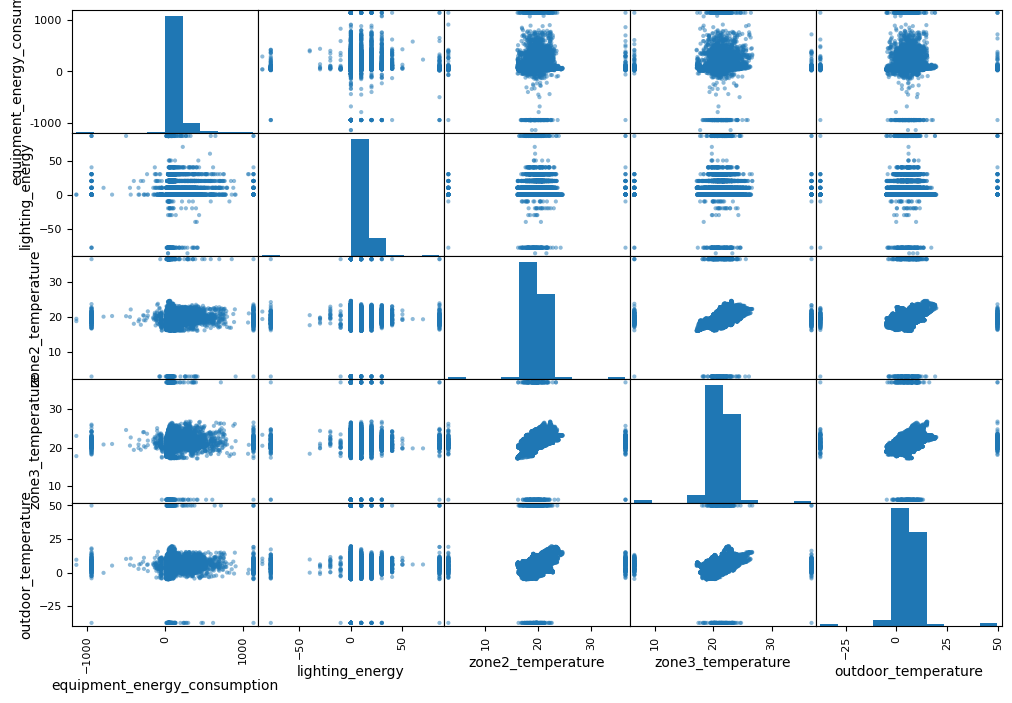

In [46]:
from pandas.plotting import scatter_matrix

cols=['equipment_energy_consumption', 'lighting_energy','zone2_temperature','zone3_temperature','outdoor_temperature']
scatter_matrix(data_cop[cols],figsize=(12,8))
plt.show()

So from the correlation matrix, it looks like `lighting_energy` and `zone2_temperature` are good predictors

So visualising them.

<Axes: xlabel='equipment_energy_consumption', ylabel='lighting_energy'>

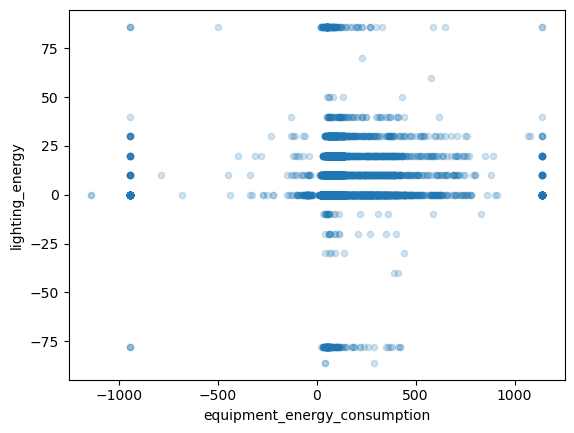

In [47]:
data_cop.plot(kind='scatter',
            alpha=0.2,
             x='equipment_energy_consumption',
             y='lighting_energy')

<Axes: xlabel='equipment_energy_consumption', ylabel='zone2_temperature'>

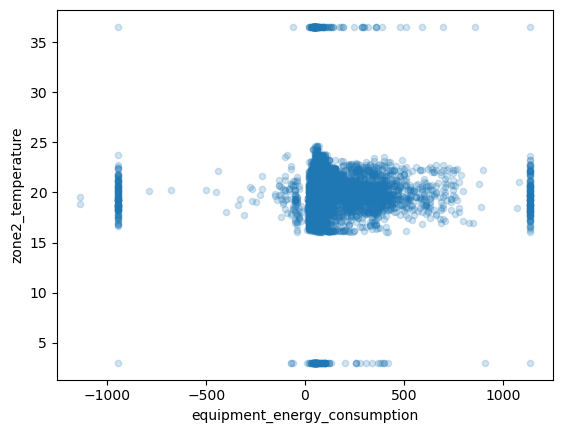

In [48]:
data_cop.plot(kind='scatter',
            alpha=0.2,
             x='equipment_energy_consumption',
             y='zone2_temperature')

<Axes: >

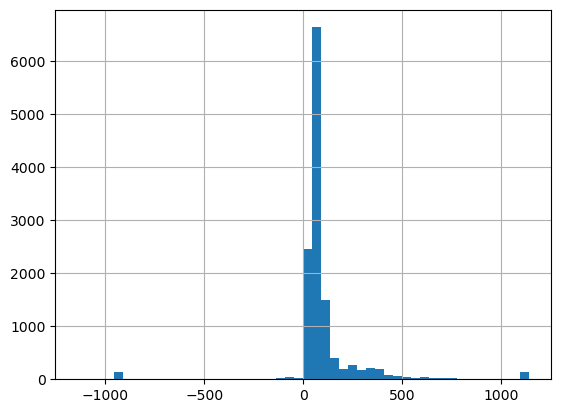

In [49]:
data_cop['equipment_energy_consumption'].hist(bins=50)

Heatmap of correlation matrix

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

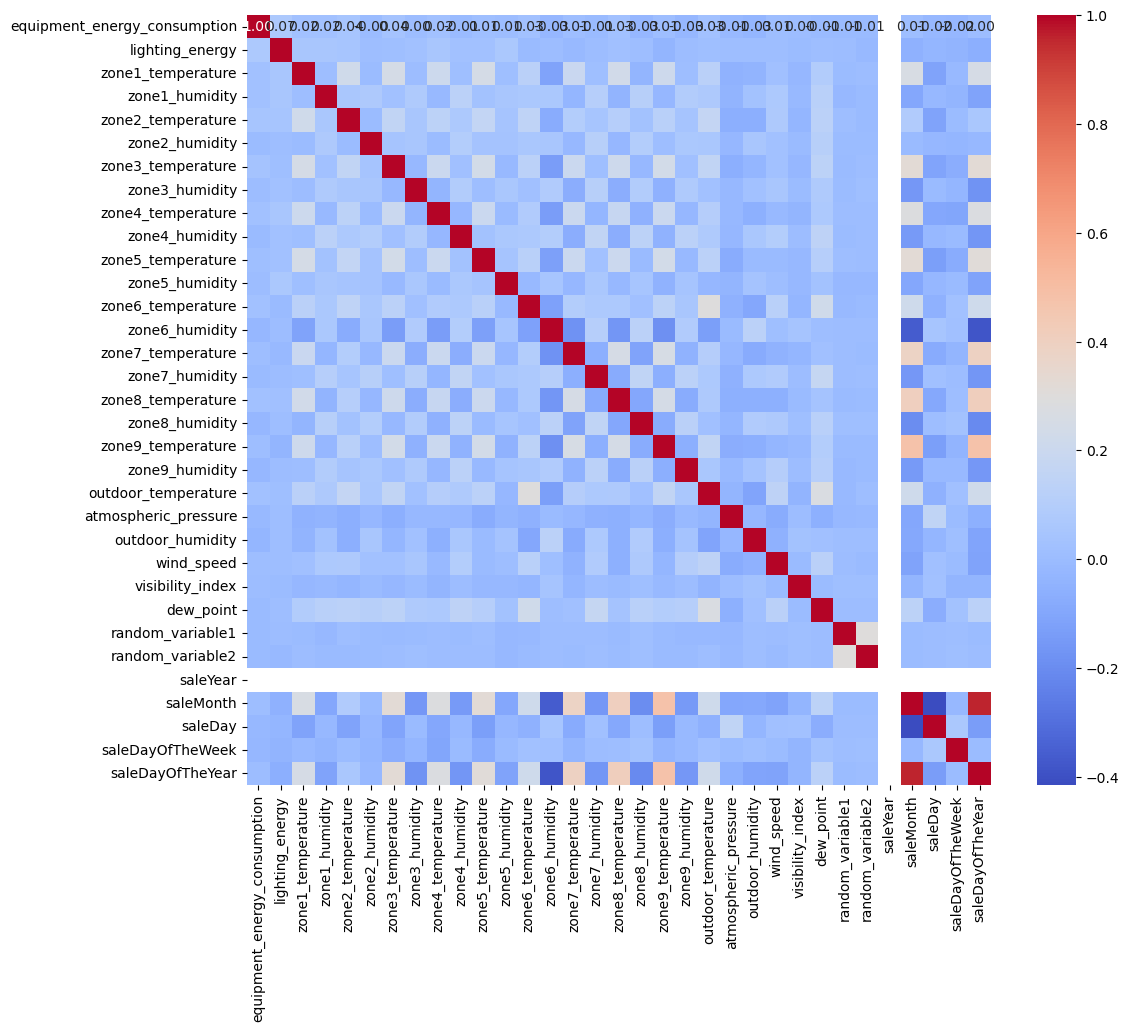

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data_cop.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')


### Imputing missing values

I'll use `SimpleImputer` from scikit-learn

In [51]:
data_cop.isna().sum()

equipment_energy_consumption    719
lighting_energy                 686
zone1_temperature               758
zone1_humidity                  720
zone2_temperature               754
zone2_humidity                  691
zone3_temperature               642
zone3_humidity                  699
zone4_temperature               667
zone4_humidity                  614
zone5_temperature               653
zone5_humidity                  623
zone6_temperature               672
zone6_humidity                  673
zone7_temperature               634
zone7_humidity                  632
zone8_temperature               677
zone8_humidity                  615
zone9_temperature               622
zone9_humidity                  714
outdoor_temperature             655
atmospheric_pressure            692
outdoor_humidity                628
wind_speed                      678
visibility_index                659
dew_point                       656
random_variable1                668
random_variable2            

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer=SimpleImputer(strategy='median')

In [54]:
X=imputer.fit_transform(data_cop)

In [55]:
# creating dataframe from the ouput of imputer
data_imputed=pd.DataFrame(X,columns=data_cop.columns,index=data_cop.index)

In [56]:
data_imputed

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.200000,44.790000,19.790000,39.060000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.200000,44.590000,19.790000,45.000000,20.033333,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,50.0,0.000000,21.890000,42.530000,19.222500,45.545000,23.500000,39.200000,21.890000,39.590000,...,1.000000,57.000000,4.400000,10.828355,10.828355,2016.0,4.0,13.0,2.0,104.0
13481,60.0,0.000000,21.890000,42.466667,19.200000,45.590000,23.463333,39.163333,21.890000,39.590000,...,1.000000,48.500000,4.350000,34.021963,34.021963,2016.0,4.0,13.0,2.0,104.0
13482,-50.0,0.000000,21.823333,42.326667,19.166667,45.626667,23.390000,39.090000,21.790000,39.466667,...,1.000000,40.000000,4.300000,43.746831,43.746831,2016.0,4.0,13.0,2.0,104.0
13483,50.0,0.000000,21.790000,42.200000,19.100000,45.700000,23.500000,39.090000,21.790000,39.400000,...,1.000000,31.500000,4.250000,8.564831,8.564831,2016.0,4.0,13.0,2.0,104.0


In [57]:
data_imputed.isna().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
saleYear                        0
saleMonth     

In [58]:
data_imputed.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,39.060000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.033333,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0


Finally the data is cleaned and is also free from missing values.

Now save the data and move to model training.

In [59]:
data_imputed.to_csv('data/train_data_cleaned_and_imputed.csv',index=False)

### Load the preprocessed data

In [60]:
data_cleaned=pd.read_csv('data/train_data_cleaned_and_imputed.csv')

In [61]:
data_cleaned.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,39.060000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.033333,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0


In [62]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  13485 non-null  float64
 1   lighting_energy               13485 non-null  float64
 2   zone1_temperature             13485 non-null  float64
 3   zone1_humidity                13485 non-null  float64
 4   zone2_temperature             13485 non-null  float64
 5   zone2_humidity                13485 non-null  float64
 6   zone3_temperature             13485 non-null  float64
 7   zone3_humidity                13485 non-null  float64
 8   zone4_temperature             13485 non-null  float64
 9   zone4_humidity                13485 non-null  float64
 10  zone5_temperature             13485 non-null  float64
 11  zone5_humidity                13485 non-null  float64
 12  zone6_temperature             13485 non-null  float64
 13  z

In [63]:
data_cleaned.saleDayOfTheWeek.value_counts()

saleDayOfTheWeek
2.0    2022
1.0    2019
0.0    1922
3.0    1884
4.0    1882
5.0    1878
6.0    1878
Name: count, dtype: int64

## Function for preprocessing new data or test data

In [ ]:
def preprocess(data):
    

## Training a baseline model

Now I'll train a baseline model which will be a `RandomForestRegressor` as it is the best model for regresion task. It is an ensemble model and performs the best for regression tasks and is also not sensitive to outliers and also it does not require feature scaling.

So for these reasons, I have choosen `RandomForestRegressor` for model training.